In [1]:
import pandas as pd
import matplotlib
import os
import sys
%matplotlib inline

In [2]:
# Create DataFrame
d = {'Channel':[1], 'Number':[255]}
df = pd.DataFrame(d)
df

,Channel,Number
0,1,255


In [4]:
# Export to Excel

df.to_excel('test1.xlsx', sheet_name = 'test1', index = False)
df.to_excel('test2.xlsx', sheet_name = 'test2', index = False)
df.to_excel('test3.xlsx', sheet_name = 'test3', index = False)
print('Done')

Done


In [6]:
# List to hold file names
FileNames = []

# Find any file that ends with ".xlsx"
for files in os.listdir("."):
    if files.endswith(".xlsx"):
        FileNames.append(files)
        
FileNames

['test1.xlsx', 'test2.xlsx', 'test3.xlsx']

In [7]:
def GetFile(fnombre):

    # Path to excel file
    # Your path will be different, please modify the path below.
    location = fnombre
    
    # Parse the excel file
    # 0 = first sheet
    df = pd.read_excel(location, 0)
    
    # Tag record to file name
    df['File'] = fnombre
    
    # Make the "File" column the index of the df
    return df.set_index(['File'])

In [8]:
# Create a list of dataframes
df_list = [GetFile(fname) for fname in FileNames]
df_list

[            Channel  Number
 File                       
 test1.xlsx        1     255,             Channel  Number
 File                       
 test2.xlsx        1     255,             Channel  Number
 File                       
 test3.xlsx        1     255]

In [9]:
# Combine all of the dataframes into one
big_df = pd.concat(df_list)
big_df

,Channel,Number
File,,
test1.xlsx,1,255
test2.xlsx,1,255
test3.xlsx,1,255


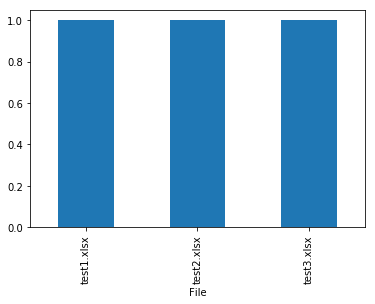

In [10]:
# Plot it!
big_df['Channel'].plot.bar();